# **Aproximación de pi por medio del método de Montecarlo**

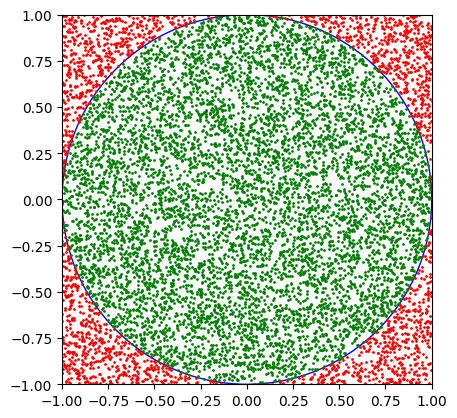

Aproximación de π con 10000 muestras: 3.146


In [2]:
import matplotlib.pyplot as plt
import random

def calcular_pi(num_muestras):
    puntos_x_dentro = []
    puntos_y_dentro = []
    puntos_x_fuera = []
    puntos_y_fuera = []

    puntos_dentro_circulo = 0
    for _ in range(num_muestras):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)

        # Determinar si los puntos están dentro del círculo
        if x**2 + y**2 <= 1:
            puntos_dentro_circulo += 1
            puntos_x_dentro.append(x)
            puntos_y_dentro.append(y)
        else:
            puntos_x_fuera.append(x)
            puntos_y_fuera.append(y)

    # Graficar el círculo y los puntos
    circulo = plt.Circle((0, 0), 1, color='b', fill=False)
    fig, ax = plt.subplots()
    ax.add_artist(circulo)
    ax.set_aspect('equal', 'box')
    ax.scatter(puntos_x_dentro, puntos_y_dentro, color='g', s=1)  # puntos dentro del círculo en verde
    ax.scatter(puntos_x_fuera, puntos_y_fuera, color='r', s=1)    # puntos fuera del círculo en rojo
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    plt.show()

    # Calcular la aproximación de Pi
    aproximacion_pi = 4 * puntos_dentro_circulo / num_muestras
    return aproximacion_pi

# Número de muestras/puntos aleatorios
muestras = 10000

# Llamada a la función para calcular π
pi_aproximado = calcular_pi(muestras)
print(f"Aproximación de π con {muestras} muestras: {pi_aproximado}")

# **Aproximación de pi por medio del método de Montecarlo sin librerias**

## **Generador de numeros pseudoaleatorios**

In [3]:
def gen_mersenneTwister(seed,n):
    numeros_pseudos_entero = []
    numeros_pseudos_float = []

    # Estado interno
    state = [0] * 624
    index = 624

    # Inicialización directa con la semilla dada
    state[0] = seed
    for i in range(1, 624):
        state[i] = 0xFFFFFFFF & (0x6C078965 * (state[i-1] ^ (state[i-1] >> 30)) + i)
    index = 0

    # Función de retorcimiento
    def twist():
        nonlocal state, index
        for i in range(624):
            temp = 0xFFFFFFFF & ((state[i] & 0x80000000) + (state[(i+1) % 624] & 0x7FFFFFFF))
            temp_shift = temp >> 1
            if temp % 2 != 0:
                temp_shift = temp_shift ^ 0x9908B0DF
            state[i] = state[(i+397) % 624] ^ temp_shift
        index = 0

    # Función de extracción de número
    def extract_number():
        nonlocal state, index
        if index >= 624:
            twist()
        y = state[index]
        y = y ^ (y >> 11)
        y = y ^ ((y << 7) & 0x9D2C5680)
        y = y ^ ((y << 15) & 0xEFC60000)
        y = y ^ (y >> 18)
        index += 1
        #numeros_pseudos.append((0xFFFFFFFF & y) / 2**32)
        return  (((0xFFFFFFFF & y) / 2**32 ) *2) -1 , (0xFFFFFFFF & y)

    for _ in range(n):
        flotante , entero =extract_number()
        numeros_pseudos_entero.append(entero)
        numeros_pseudos_float.append(flotante)

    # print(extract_number())

    # Retornamos las funciones
#    return extract_number
    return numeros_pseudos_entero ,  numeros_pseudos_float

# Uso del generador
#extract_number = gen_mersenneTwister(12345)
#for _ in range(10):
   # print(extract_number())

## **Cálculo de pi**

In [4]:
import matplotlib.pyplot as plt

def calcular_pi(num_muestras):
    puntos_x_dentro = []
    puntos_y_dentro = []
    puntos_x_fuera = []
    puntos_y_fuera = []

    puntos_dentro_circulo = 0

    m = 9914
    semilla = 3454621
    for _ in range(num_muestras):
        x_lista_entera , x_lista_flotante = gen_mersenneTwister(semilla,1)
        x = x_lista_flotante[0]
        x_semilla= x_lista_entera[0]
        #print("Valor de x", x)
        #print("valor de la semilla_x ",x_semilla)

        y_lista_entera , y_lista_flotante = gen_mersenneTwister(x_semilla,1)
        y=y_lista_flotante[0]
        semilla =  y_lista_entera[0]
        #print(semilla)
        #semilla = (semilla**2) % m
        #x = semilla / m
        #semilla = (semilla**2) % m
        #y = semilla / m
        #x, y = random.uniform(-1, 1), random.uniform(-1, 1)

        # Determinar si los puntos están dentro del círculo
        if (x**2 + y**2) <= 1:
            puntos_dentro_circulo += 1
            puntos_x_dentro.append(x)
            puntos_y_dentro.append(y)
        else:
            puntos_x_fuera.append(x)
            puntos_y_fuera.append(y)

    # Graficar el círculo y los puntos
    circulo = plt.Circle((0, 0), 1, color='b', fill=False)
    fig, ax = plt.subplots()
    ax.add_artist(circulo)
    ax.set_aspect('equal', 'box')
    ax.scatter(puntos_x_dentro, puntos_y_dentro, color='g', s=1)  # puntos dentro del círculo en verde
    ax.scatter(puntos_x_fuera, puntos_y_fuera, color='r', s=1)    # puntos fuera del círculo en rojo
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    plt.show()

    # Calcular la aproximación de Pi
    aproximacion_pi = 4 * puntos_dentro_circulo / num_muestras
    return aproximacion_pi



# **Implementación**

## **Aproximacion con 100_000 muestras**

100000


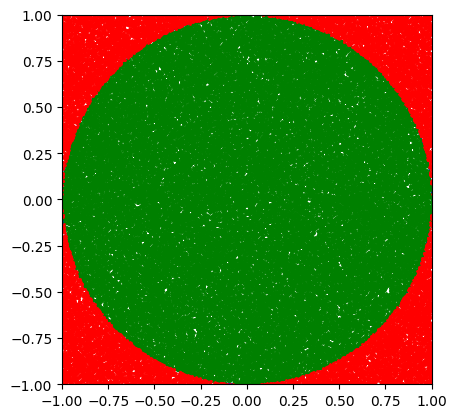

Aproximación de π con 100000 muestras: 3.14784


In [5]:
# Número de muestras/puntos aleatorios
muestras = 100000

# Llamada a la función para calcular π
print(muestras)
pi_aproximado = calcular_pi(muestras)

print(f"Aproximación de π con {muestras} muestras: {pi_aproximado}")

## **Aproximacion con 10_000 muestras**

10000


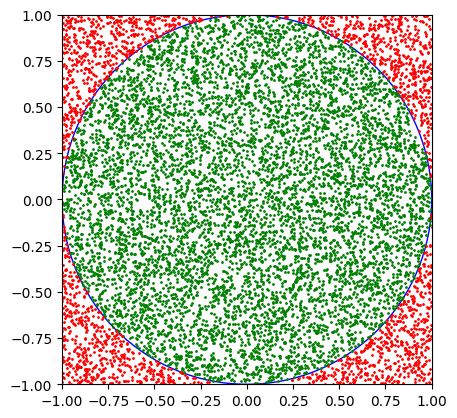

Aproximación de π con 10000 muestras: 3.1408


In [6]:
muestras = 10000

# Llamada a la función para calcular π
print(muestras)
pi_aproximado = calcular_pi(muestras)

print(f"Aproximación de π con {muestras} muestras: {pi_aproximado}")

## **Aproximacion con 1000 muestras**

1000


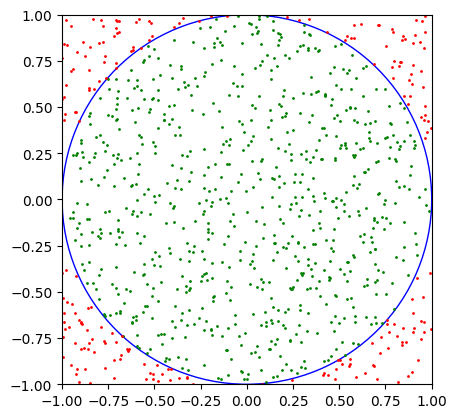

Aproximación de π con 1000 muestras: 3.136


In [7]:
muestras = 1000

# Llamada a la función para calcular π
print(muestras)
pi_aproximado = calcular_pi(muestras)

print(f"Aproximación de π con {muestras} muestras: {pi_aproximado}")